In [13]:
# Importing libraries

import os, csv, random, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

random.seed(10)

In [2]:
# path to the data file
path = '../defects/data/Jureczko/augmented_data/ant.csv'

In [3]:
# reading the data
data = pd.read_csv(path)
rows, cols = data.shape
print("Rows:",rows,"\nCols:",cols)

Rows: 2692 
Cols: 21


### Forward Selection

In [48]:
#Forward feature selection
def forwardSelection(X,y):
    gScore = pd.DataFrame(columns=['Number of features','gScore'])
    rows, cols = X.shape
    prevG = 0
    for i in range(cols+1):
        X_sub = X.iloc[:,:i+1]
        #print("Selected ",(i+1)," cols.",X_sub.shape)
        X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.33, random_state=42)
        
        clf = RandomForestClassifier(n_estimators=1000, n_jobs=1)
        clf.fit(X_train, y_train.values.ravel())
        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        recall = cm[1][1]/(cm[1][1] + cm[1][0])
        pf = cm[0][1]/(cm[0][1] + cm[0][0])
        #computing the g-score
        g = 2/((1/recall) + (1/(1-pf)))
        delta = g - prevG
        if(delta < 0):
            break
        prevG = g
        gScore.loc[i] = [i+1,g]

    return gScore


### Backward Elimination

In [129]:
#Backward feature elimination
def backwardElimination(X,y):
    gScore = pd.DataFrame(columns=['Number of features','gScore'])
    rows, cols = X.shape
    prevG = 0
    for i in range(cols-1):
        X_sub = X.iloc[:,0:cols-i]
#         print("Removed ",i," cols.",X_sub.shape)
        X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.33, random_state=42)

        clf = RandomForestClassifier(n_estimators=1000, n_jobs=1)
        clf.fit(X_train, y_train.values.ravel())
        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        recall = cm[1][1]/(cm[1][1] + cm[1][0])
        pf = cm[0][1]/(cm[0][1] + cm[0][0])
        #computing the g-score
        g = 2/((1/recall) + (1/(1-pf)))
        delta = g - prevG
        if (delta < 0):
            break
        prevG = g
        gScore.loc[i] = [cols-i,g]

    return gScore


In [158]:
def featureSelection(type, X, y):
    if (type == 'forward'):
        scores = forwardSelection(X,y)
    elif (type == 'backward'):
        scores = backwardElimination(X,y)
    
    print("Estimated g-Score: ",round(scores.tail(1).iloc[0,1],4))
    
    plt.plot(scores['Number of features'],scores['gScore'])
    plt.xlabel('Number of features')
    plt.ylabel('g Score')
    plt.grid(linewidth = 0.5)
    plt.title("Algorithm: "+type)
    plt.show()
    

Estimated g-Score:  0.7046


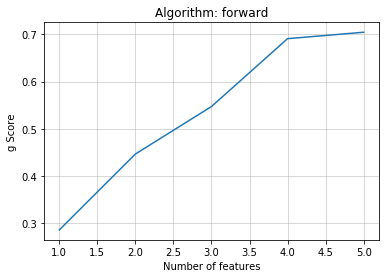

In [159]:
X = data.loc[:,data.columns!='$<bug']
y = data.loc[:,data.columns=='$<bug']  

featureSelection('forward',X,y)

Estimated g-Score:  0.7402


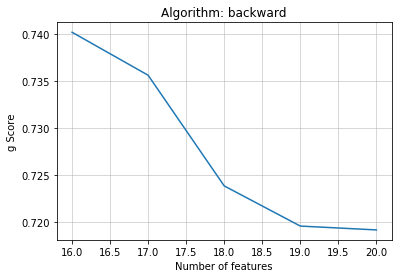

In [160]:
featureSelection('backward',X,y)